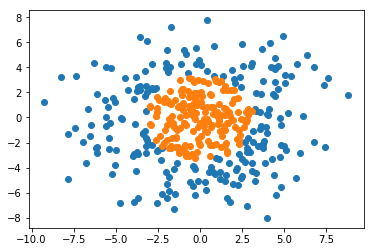

In [2]:
# 引入必要的包
import numpy as np
import matplotlib.pyplot as plt

# 手工制造数据集
np.random.seed(2333)
X = np.random.normal(0, 3, size=(400, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 10.5, dtype=np.int)

# 画出两类数据的分布情况
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [6]:
# 从scikit-learn中引入必要的机器学习模型
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 将训练集和测试集分离
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=233)

# 实例化一个逻辑回归模型，进行训练，并打印模型精度
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test, y_test))

Accuracy:  0.47


# 可调整的超参数：
#### penalty: str 类型，可取 ‘l1’ 或者 ‘l2’，默认值为 ‘l2’，用于明确损失函数惩罚项的正则类型；
#### tol: float 类型，默认值为 1e-4，表示容差，用于决定是否停止搜索；
#### C: float 类型，默认值为1.0，表示正则项的系数，用来决定模型需要正则化的程度；
#### solver: str 类型，默认取 'liblinear'，可取{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} 中任一个，表示在优化过程中所使用的算法；
#### max_iter: int 型，默认取100，表示在优化收敛的过程中最大迭代的次数；

In [7]:
# 实例化一个逻辑回归模型，并传入相应的超参数，接着训练，打印模型准确度
log_reg2 = LogisticRegression(C=0.1, penalty='l1')
log_reg2.fit(X_train, y_train)
print("Accuracy: ", log_reg2.score(X_test, y_test))

Accuracy:  0.55


#### 这精度还是不行，稍微分析下数据可知，样本的标签值是与样本的特征有多项式关系，这就很容易想到可以用 scikit-learn 中的 PolynomialFeatures 类对数据进行预处理，这个过程可以用 Pipeline 进行简化处理。

In [10]:
# 引入必要的包
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# 使用Pipline将数据特征的多项式处理于模型实例化封装在一起为一个函数
def LogisticPolyRegression(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std', StandardScaler()),
        ('Log_reg', LogisticRegression(C=C))
    ])

# 实例化一个多项式回归模型，并进行训练，打印模型的精度
log_polyreg = LogisticPolyRegression(2)
log_polyreg.fit(X_train, y_train)
print('Accuracy: ', log_polyreg.score(X_test, y_test))

Accuracy:  0.97


#### 引入KNN行比较，kNN 是 k 近邻算法

In [11]:
# 实例化一个kNN模型，并进行训练
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
print('Accuracy: ', knn_clf.score(X_test, y_test))

Accuracy:  0.95
